<a href="https://colab.research.google.com/github/anupks2510/astronomical_images/blob/main/stable_diffusion.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:

!pip install torch torchvision torchaudio --extra-index-url https://download.pytorch.org/whl/cu117
!pip install diffusers[torch] transformers
!pip install opencv-python


Looking in indexes: https://pypi.org/simple, https://download.pytorch.org/whl/cu117
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.7/2.7 MB 57.9 MB/s eta 0:00:00


In [3]:
import torch
from diffusers import StableDiffusionPipeline
import cv2
import numpy as np
import matplotlib.pyplot as plt


The cache for model files in Transformers v4.22.0 has been updated. Migrating your old cache. This is a one-time only operation. You can interrupt this and resume the migration later on by calling `transformers.utils.move_cache()`.


0it [00:00, ?it/s]

In [4]:
from diffusers import StableDiffusionPipeline

# Load pretrained model
model_id = "CompVis/stable-diffusion-v1-4"
pipe = StableDiffusionPipeline.from_pretrained(model_id, torch_dtype=torch.float16).to("cuda")


/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:89: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


model_index.json:   0%|          | 0.00/541 [00:00<?, ?B/s]

Fetching 16 files:   0%|          | 0/16 [00:00<?, ?it/s]

model.safetensors:   0%|          | 0.00/1.22G [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/492M [00:00<?, ?B/s]

text_encoder/config.json:   0%|          | 0.00/592 [00:00<?, ?B/s]

scheduler/scheduler_config.json:   0%|          | 0.00/313 [00:00<?, ?B/s]

(…)ature_extractor/preprocessor_config.json:   0%|          | 0.00/342 [00:00<?, ?B/s]

tokenizer/merges.txt:   0%|          | 0.00/525k [00:00<?, ?B/s]

safety_checker/config.json:   0%|          | 0.00/4.56k [00:00<?, ?B/s]

(…)kpoints/scheduler_config-checkpoint.json:   0%|          | 0.00/209 [00:00<?, ?B/s]

tokenizer/special_tokens_map.json:   0%|          | 0.00/472 [00:00<?, ?B/s]

tokenizer/tokenizer_config.json:   0%|          | 0.00/806 [00:00<?, ?B/s]

tokenizer/vocab.json:   0%|          | 0.00/1.06M [00:00<?, ?B/s]

unet/config.json:   0%|          | 0.00/743 [00:00<?, ?B/s]

vae/config.json:   0%|          | 0.00/551 [00:00<?, ?B/s]

diffusion_pytorch_model.safetensors:   0%|          | 0.00/335M [00:00<?, ?B/s]

diffusion_pytorch_model.safetensors:   0%|          | 0.00/3.44G [00:00<?, ?B/s]

Loading pipeline components...:   0%|          | 0/7 [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/transformers/tokenization_utils_base.py:1601: FutureWarning: `clean_up_tokenization_spaces` was not set. It will be set to `True` by default. This behavior will be depracted in transformers v4.45, and will be then set to `False` by default. For more details check this issue: https://github.com/huggingface/transformers/issues/31884
  warnings.warn(


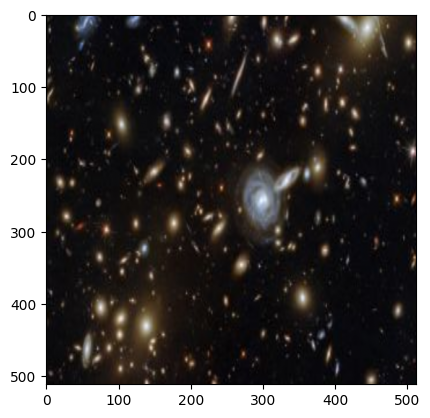

In [11]:
img = cv2.imread("/content/astro_image.jpg")  # Load image
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)  # Convert to RGB
img = cv2.resize(img, (512, 512))  # Resize to 512x512 (match the model input size)
img = img / 255.0  # Normalize to range [0, 1]

plt.imshow(img)
plt.show()


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

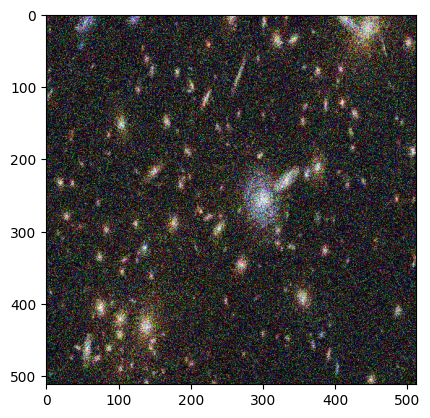

In [12]:
def add_noise(image, noise_factor=0.2):
    noisy_img = image + noise_factor * np.random.randn(*image.shape)
    noisy_img = np.clip(noisy_img, 0, 1)
    return noisy_img

noisy_img = add_noise(img, noise_factor=0.3)

plt.imshow(noisy_img)
plt.show()


In [13]:
from PIL import Image
import torch

# Convert to a PIL image
noisy_img_pil = Image.fromarray((noisy_img * 255).astype(np.uint8))

# Use Stable Diffusion to denoise
prompt = ""  # No text prompt needed for denoising
output = pipe(prompt=prompt, init_image=noisy_img_pil, strength=0.75, guidance_scale=7.5)["sample"][0]

# Convert the output to a NumPy array and show the result
output_img = np.array(output)
plt.imshow(output_img)
plt.show()


  0%|          | 0/50 [00:00<?, ?it/s]

KeyError: 'sample'